In [1]:
import os
import pandas as pd

def extract_fish_data(excel_path, images_folder):
    """
    Match fish data from Excel table with fish images in a folder. 
    Zip the Image Names (Data) with the Edema and Curved columns (Labels).
    
    Parameters:
        excel_path (str): Path to the Excel table with columns 'sample', 'fish', 'edema', 'curved'.
        images_folder (str): Path to the folder containing fish images.
        
    Returns:
        list: A list of tuples (image_filename, edema, curved).
    """
    # Load the Excel table
    data = pd.read_excel(excel_path)
    
    # Ensure columns are correctly named
    required_columns = {'Sample', 'Fish_Num', 'Edema', 'Curved'}
    if not required_columns.issubset(data.columns):
        raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

    # Prepare the output list
    matched_data = []
    
    # Iterate through the Excel rows
    for _, row in data.iterrows():
             
        # Skip rows with 'NAW' in either 'edema' or 'curved'
        if row['Edema'] == "NAW" or row['Curved'] == "NAW":
            continue
        
        # Search for corresponding image file
        for image_file in os.listdir(images_folder):
            if f"pr_{str(row['Sample'])}" in image_file and f"-{str(row['Fish_Num']).zfill(2)}." in image_file:
                # Match found, append to result list
                matched_data.append((image_file, row['Edema'], row['Curved']))
                break  # Move to the next row in the Excel table

    return matched_data

# Example usage
excel_path = "Annotation_Zebrafish.xlsx"
images_folder = "Zebra_fish_data/TIFF_exp2_181024"
zip_data = extract_fish_data(excel_path, images_folder)

# Print the result
for item in zip_data:
    print(item)


('PlatteA_119hpf_pr_20-01.tif', 3, 3)
('PlatteA_119hpf_pr_20-02.tif', 2, 4)
('PlatteA_119hpf_pr_20-03.tif', 1, 1)
('PlatteA_119hpf_pr_20-04.tif', 2, 3)
('PlatteA_119hpf_pr_20-05.tif', 2, 1)
('PlatteA_119hpf_pr_20-06.tif', 3, 3)
('PlatteA_119hpf_pr_20-07.tif', 2, 1)
('PlatteA_119hpf_pr_20-08.tif', 2, 2)
('PlatteA_119hpf_pr_20-09.tif', 2, 4)
('PlatteA_119hpf_pr_20-10.tif', 2, 4)
('PlatteA_119hpf_pr_20-11.tif', 2, 3)
('PlatteA_119hpf_pr_20-12.tif', 2, 4)
('PlatteA_119hpf_pr_20-13.tif', 2, 4)
('PlatteA_119hpf_pr_20-14.tif', 2, 3)
('PlatteA_119hpf_pr_20-15.tif', 2, 2)
('PlatteA_119hpf_pr_20-16.tif', 3, 4)
('PlatteA_119hpf_pr_20-17.tif', 3, 4)
('PlatteA_119hpf_pr_20-18.tif', 2, 3)
('PlatteA_119hpf_pr_20-19.tif', 2, 4)
('PlatteA_119hpf_pr_20-20.tif', 3, 3)
('PlatteA_119hpf_pr_20-21.tif', 1, 1)
('PlatteA_119hpf_pr_20-22.tif', 2, 2)
('PlatteA_119hpf_pr_20-23.tif', 3, 2)
('PlatteA_119hpf_pr_20-24.tif', 2, 4)
('PlatteA_119hpf_pr_20-25.tif', 1, 2)
('PlatteA_119hpf_pr_20-26.tif', 2, 3)
('PlatteA_11

In [2]:
from sklearn.model_selection import train_test_split

def stratified_split(data, stratify_by="edema", test_size=0.2, shuffle=True):
    """
    Performs a stratified train-test split on edema or curved as label.
    
    Parameters:
        data (list of tuples): The data to split, where each tuple is (filename, edema, curved).
        stratify_by (str): The field to stratify by, either 'edema' (2nd entry) or 'curved' (3rd entry).
        test_size (float): The proportion of the dataset to include in the test split.
        shuffle (bool): Whether to shuffle the data before splitting.
        
    Returns:
        tuple: Two lists - (train_data, test_data).
    """
    if stratify_by not in ["edema", "curved"]:
        raise ValueError("stratify_by must be either 'edema' or 'curved'")

    # Determine the index for stratification
    stratify_index = 1 if stratify_by == "edema" else 2

    # Extract the stratification labels
    stratify_labels = [entry[stratify_index] for entry in data]

    # Perform the train-test split
    train_data, test_data = train_test_split(
        data,
        test_size=test_size,
        random_state=42,
        shuffle=shuffle,
        stratify=stratify_labels
    )

    return train_data, test_data


train_data, test_data = stratified_split(zip_data, stratify_by="edema", test_size=0.3, shuffle=True)

# Print results
print(f"Length of Train: {len(train_data)}")

print(f"Length of Test: {len(test_data)}")


Length of Train: 58
Length of Test: 25


Batch Images Shape: (10, 1460, 1936, 3)
Batch Labels: [[4 4]
 [3 2]
 [4 4]
 [2 3]
 [4 4]
 [1 1]
 [2 4]
 [3 3]
 [1 2]
 [2 3]]


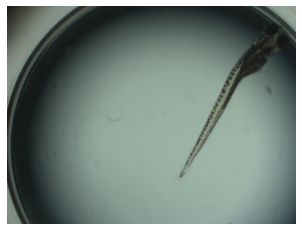

Batch Images Shape: (10, 1460, 1936, 3)
Batch Labels: [[4 4]
 [3 3]
 [3 3]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 1]
 [3 1]
 [1 2]]


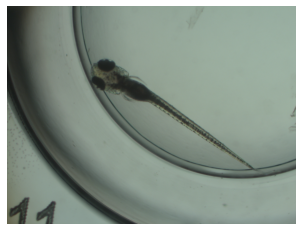

Batch Images Shape: (10, 1460, 1936, 3)
Batch Labels: [[2 4]
 [3 4]
 [2 2]
 [4 4]
 [2 2]
 [3 4]
 [4 4]
 [2 4]
 [4 4]
 [2 4]]


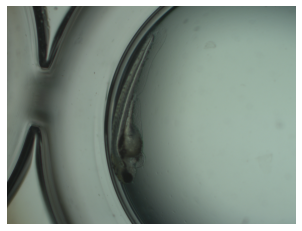

Batch Images Shape: (10, 1460, 1936, 3)
Batch Labels: [[4 4]
 [4 4]
 [3 3]
 [3 3]
 [3 3]
 [2 3]
 [2 3]
 [2 3]
 [4 4]
 [3 3]]


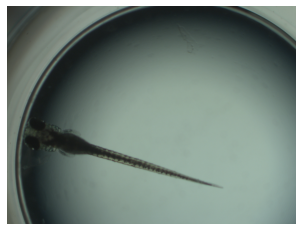

Batch Images Shape: (10, 1460, 1936, 3)
Batch Labels: [[2 2]
 [2 4]
 [3 3]
 [2 4]
 [4 4]
 [4 4]
 [2 3]
 [4 4]
 [2 3]
 [2 1]]


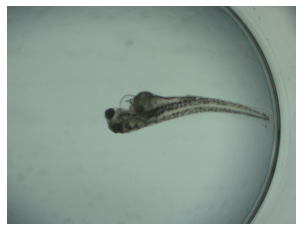

Batch Images Shape: (8, 1460, 1936, 3)
Batch Labels: [[2 1]
 [4 4]
 [3 2]
 [4 4]
 [2 4]
 [2 4]
 [4 4]
 [4 4]]


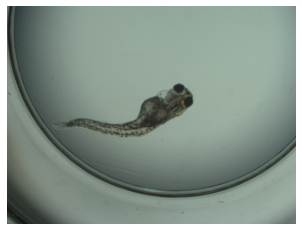

In [3]:
import os
import random
from PIL import Image
import numpy as np

def zebra_loader(data, image_folder, batch_size=32, shuffle=False):
    
    #???Option wenn batch nicht benötigt wird automatisch batch size auf len(data) setzen???
    """
    Simple data loader that returns batches of images and labels.
    
    Parameters:
        data (list of tuples): List of tuples (filename, edema, curved).
        image_folder (str): Path to the folder containing images.
        batch_size (int): Number of samples per batch.
        shuffle (bool): Whether to shuffle the data or not.
    
    Yields:
        tuple: (batch_images, batch_labels), where batch_images is a NumPy array of images
               and batch_labels is a list of tuples (edema, curved). 
               
               ???ergänzen von toggle nur edema oder curved???
    """
    
    # Shuffle the data if requested
    if shuffle:
        random.shuffle(data)

    # Start iterating over the data in batches
    for i in range(0, len(data), batch_size):
        # Get the current batch (slice the data)
        batch_data = data[i:i+batch_size]
        
        # Lists to hold images and labels for the batch
        batch_images = []
        batch_labels = []
        
        for filename, edema, curved in batch_data:
            # Create the path to the image
            image_path = os.path.join(image_folder, filename)
            try:
                # Open the image and convert to RGB (if not already in RGB)
                image = Image.open(image_path).convert("RGB")
                
                #??? here padding, resizing, normalization, augmentation can be added ???
                
                batch_images.append(np.array(image)) #???toggle für tensor/np.array???
                batch_labels.append((edema, curved))
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
                continue
        
        # Convert lists to NumPy arrays before yielding
        # ???hier gehen matadaten aus dem file name verloren: sample und fish_num. Lieber beibehalten???
        
        yield np.array(batch_images), np.array(batch_labels)
        


import matplotlib.pyplot as plt  # Zum Anzeigen des Bildes

# Batches laden
for batch_images, batch_labels in zebra_loader(train_data, images_folder, batch_size=10, shuffle=True):
    print(f"Batch Images Shape: {batch_images.shape}")
    print(f"Batch Labels: {batch_labels}")
    
    # Anzeige des ersten Bildes im aktuellen Batch
    first_image = batch_images[0]
    
    # Das erste Bild anzeigen
    plt.imshow(first_image)
    plt.axis('off') 
    plt.show()